# 26

The aqueous decomposition of A is studied in an experimental mixed reactor. The results in the table are obtained in steady-state runs. To obtain 75% conversion of reactant in a feed with CA0 = 0,8 mol/l, what residence time is required:

a) in a plug flow reactor [300 s]

b) in a mixed flow reactor [1200 s]

|Concentration of A, mol/l|Concentration of A, mol/|Residence time, sec|
|---|---|---|
|In Feed|In Exit||
|2.00|0.65|300|
|2.00|0.92|240|
|2.00|1.00|250|
|1.00|0.56|110|
|1.00|0.37|360|
|0.48|0.42|24|
|0.48|0.28|200|
|0.48|0.2|560|


$$ r_A = \frac{C_{Ao}-C_A}{\tau} $$

<img src="tut 26.png">

Emperical expression that will work for a reactor with the conditions within the bounds of this expression: $0.2<C_A<1$

$$ r_A = -0.0226C_A^3+0.0281C_A^2-0.0014CA-0.0003 $$

The required PRF and CSTR need to operate between 0.8 mol/L and 0.2 mol/L



The CSTR is easy, it operates at the outlet conditions:

$$C_A = 0.2 mol/L $$

$$ C_{Ao} = 0.8 mol/L$$

$$ -r_A = (-0.0226(0.2)^3)+0.0281(0.2)^2-0.0014(0.2)-0.0003 $$

$$ \tau = \frac{C_{Ao}-C_A}{-r_A} $$

In [3]:
CA = 0.2
CAo = 0.8
rA = -(-0.0226*CA**3+0.0281*CA**2-0.0014*CA-0.0003)
τ= (CAo-CA)/(-rA)

print('rA=', rA, 'τ=', τ)

rA= -0.0003632000000000001 τ= 1651.9823788546253


Alternatively you could use the $r_A=-0.0005 \frac{mol}{L.s}$ as calculated originally at $C_A = 0.2 mol/L$

In [5]:
CA = 0.2
CAo = 0.8
rA = -0.0005
τ= (CAo-CA)/(-rA)

print('rA=', rA, 'τ=', τ)

rA= -0.0005 τ= 1200.0000000000002


Both methods would be acceptable, as long as you clearly show how you got the answer.

The PFR is a bit more complicated, you need to know the rate at each point along the curve describing the $-r_A(C_A)$

The PFR mole balance:

$$ \frac{dF_A}{dV} = r_A $$

Which can be rewritten in terms of $C_A$ as (liquid phase!!):

$$ \frac{dC_A}{d\tau} = r_A $$

[ 0.20028954]


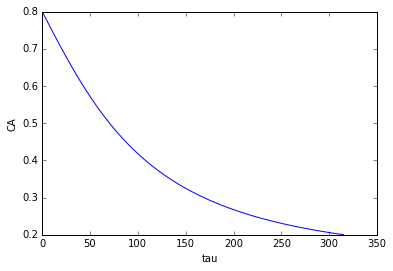

In [24]:
def r(CA):
    rA = -(-0.0226*CA**3+0.0281*CA**2-0.0014*CA-0.0003)
    return rA

def PFR(CA, τ):
    dCAdτ = r(CA)
    return dCAdτ

from numpy import linspace
from scipy.integrate import odeint
import matplotlib.pyplot as plt
% matplotlib inline

τsolve = 315
τspan = linspace(0, τsolve)

CAout = odeint(PFR, 0.8, τspan)
print(CAout[-1])
plt.plot(τspan, CAout)
plt.ylabel('CA')
plt.xlabel('tau')

The PFR residence time is 315 s and the CSTR residence time is 1200 (1600) s

## 27

This problem is similar to 26, in this case it seems like some weird kinetics apply yet again...

Let's start by looking at the keywords:

### Liquid phase

### Batch reactor

### $A\to B$

### 7 g/L Catalyst (catalysed reaction)

### Profile:

<img src="Tut5_9.png" width="600" />

### a) 

Can we fit a powerlaw fit to the data? Well how would a powerlaw fit look? 

Generally the powerlaw fit would have an initial quick drop which slowed down as $C_A$ decreased. This curve has a characteristic S-shape.

This shape is usually known to correspond to an autocatalytic system, but can also describe systems that experience inhibition, systems that heat up over time (exothermic) etc. This makes it difficult to determine exactly the model that can be used to describe the kinetics.

Therefore, there is not enough information to fit the kinetics of the system.

### b)

Now we need to determine the amount of catalyst that a CSTR would require to convert 50% of a 0.5 L/h stream with a $C_{Ao}= 2.5 mol/L$ ($C_{Ao,batch, t=0}$).

This means we need W. Let's see what we do have...
* First we have the the CSTR equation: 
$$ C_{Ao}-C_A=-r_A\tau$$
* Then we know the $C_{Ao}$ and $C_A$ and Q
* Finally we can determine the $-r_A$-value from the figure...HOW?

Remember that the mole balance in a catalysed batch reactor can be described by:
$$ \frac{dC_A}{dt} = r_A'\frac{W}{V} $$

We are given $\frac{W}{V}=7\:g/L$. This means that the slope of the $C_A$ vs. t graph (given) at a certain $C_A$, divided by the catalyst concentration would yield the $r_A$ at that $C_A$. 

From the figure is seems that the slope give a straight line around 50% conversion ($C_A = 1.25 mol/L$), but there is a free tool online (curvesnap) I will use to extract the data from the plot.

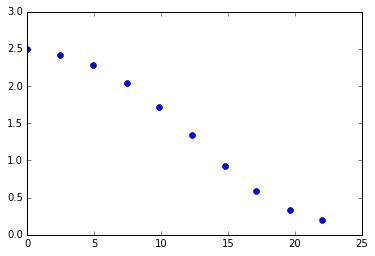

In [26]:
from numpy import array
Data = array([[0,2.50146],
[2.47475,2.41399],
[4.89899,2.2828],
[7.42424,2.0379],
[9.84848,1.72303],
[12.2727,1.33819],
[14.798,0.918367],
[17.1212,0.586006],
[19.6465,0.332362],
[22.0202,0.19242]])

plt.plot(Data[:, 0], Data[:, 1], 'o')

Now we can estimate the $r_A$ by finding the slope between points

[-0.00504928 -0.00773085 -0.01385436 -0.01855486 -0.02267828 -0.02374954
 -0.02043739 -0.01434873 -0.00842217] [2.4577249999999999, 2.348395, 2.1603500000000002, 1.8804650000000001, 1.53061, 1.1282785, 0.75218650000000009, 0.45918400000000004, 0.26239099999999999]


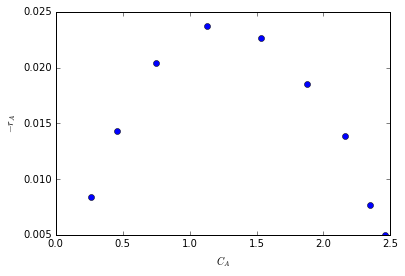

In [28]:
rA = array([(Data[i, 1]-Data[i-1, 1])/(Data[i, 0]-Data[i-1, 0]) for i in range(1, len(Data[:, 0]))])/7
CAmid = [(Data[i, 1]+Data[i-1, 1])/2 for i in range(1, len(Data[:, 0]))]
print (rA, CAmid)
plt.plot(CAmid, -rA, 'o')
plt.xlabel('$C_A$')
plt.ylabel('$-r_A$')

This curve is clearly a parabolic shapre which we can fit fastest using excel

<img src="Tut 27.png">

This should give you guys enough of a start to complete the question...